## 1. Perkenalan

======================================================================================================================

Nama : Akram Huwaidi Irnawan

Dataset : Bank Loan Approval Data (https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset)

Objective : Tujuan dari aplikasi ini adalah untuk mengotomatisasi proses kelayakan pinjaman dengan nilai  akurat apakah pinjaman harus disetujui atau tidak.

======================================================================================================================

Latar Belakang & Problem Statement

Latar belakang dari aplikasiBank Loan Approval berakar pada tantangan yang dihadapi oleh lembaga keuangan dalam mengevaluasi kelayakan pinjaman. Proses ini seringkali memakan waktu dan sumber daya yang signifikan, dan masih rentan terhadap bias manusia dan kesalahan. Dalam industri perbankan, proses persetujuan pinjaman melibatkan penilaian manual dari banyak faktor, termasuk riwayat kredit, pendapatan, jumlah tanggungan, dan banyak lagi. Meskipun proses ini telah diperbaiki seiring waktu, masih ada ruang untuk peningkatan efisiensi dan akurasi. Selain itu, bias manusia dapat mempengaruhi keputusan pinjaman. Misalnya, penilai mungkin secara tidak sadar lebih memilih untuk menyetujui pinjaman untuk pelamar yang memiliki latar belakang yang mirip dengan mereka. Dengan menggunakan model machine learning untuk memprediksi persetujuan pinjaman, kita dapat membantu mengurangi bias ini dan memastikan bahwa semua pelamar diperlakukan secara adil. Akhirnya, dengan meningkatnya digitalisasi di sektor perbankan, pelanggan sekarang mengharapkan proses yang cepat dan mulus. Mereka tidak ingin menunggu berhari-hari atau berminggu-minggu untuk mengetahui apakah pinjaman mereka disetujui. Dengan mengotomatisasi proses ini, bank dapat memberikan keputusan lebih cepat, meningkatkan kepuasan pelanggan. Oleh karena itu, pengembangan aplikasi Prediksi Persetujuan Pinjaman bertujuan untuk mengatasi tantangan ini dan membantu lembaga keuangan membuat proses persetujuan pinjaman menjadi lebih efisien, akurat, adil, dan ramah pengguna.

## 2. Import Libraries

In [80]:
# Import for Pandas and numpy
import pandas as pd
import numpy as np

# # Import for Phik Correlation
from phik.report import plot_correlation_matrix

# Import for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import for train test split
from sklearn.model_selection import train_test_split

# import for Outlier
from scipy.stats import skew
from scipy import stats
from scipy.stats import randint


# import for caping
from feature_engine.outliers import Winsorizer

# Import for scaling and encoder
from sklearn.preprocessing import StandardScaler

# Import for Data Balancing
from imblearn.over_sampling import SMOTE

# Import for Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Import for Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Import for cross validation dan skfold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import StratifiedKFold
import joblib


from warnings import filterwarnings
filterwarnings('ignore')

## 4. Data Loading

| Kolom | Penjelasan Kolom |
| --- | --- |
| `loan_id` | id peminjaman | 
| `no_of_dependents` | Jumlah tanggungan | 
| `education` | Tingkat pendidikan (Graduate, Not Graduate) | 
| `self_employed` | Status wiraswasta (Yes, No) | 
| `income_annum` | Pendapatan tahunan pelamar | 
| `loan_amount` | Jumlah pinjaman yang diajukan |
| `loan_term` | Durasi pinjaman dalam bulan |
| `cibil_score` | Skor kredit pelamar dari CIBIL |
| `residential_assets_value` | Nilai aset residensial pelamar |
| `commercial_assets_value` | Nilai aset komersial pelamar |
| `luxury_assets_value` | Nilai aset mewah pelamar |
| `bank_asset_value` | Nilai aset bank pelamar  |
| `loan_status` | Apakah pinjaman diterima atau tidak dimana nanti akan berubah menjadi 1=Approved dan 0=Rejected |

In [81]:
#Pembuatan dataframe
df = pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [82]:
# Info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [83]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [84]:
# Untuk menghapus spasi di awal nama kolom
df.columns = [col.lstrip() for col in df.columns]

In [85]:
# Duplicate dataset sebagai main dataframe
data_duplicate = df.copy()

In [86]:
# Duplicate dataset sebagai data_temp hanya digunkaan untuk memudahkan mengecek korelasi  
data_temp = df.copy()
data_temp = data_temp.drop_duplicates()
data_temp = data_temp.dropna()

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


## 5. Exploratory Data Analysis (EDA)

### 5.1 Distribusi 'loan_status'

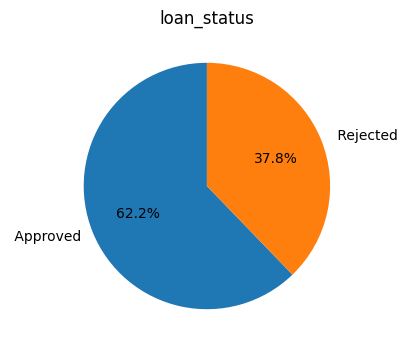

In [88]:
# Count occurrences of each category in 'default_payment_next_month'
default_counts = df['loan_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('loan_status')
plt.show()

Berdasarkan gambar pie chart yang Anda bagikan, tampaknya ini adalah visualisasi dari status pinjaman. Dari total pinjaman, 62.2% telah disetujui dan 37.8% telah ditolak. Ini menunjukkan bahwa sebagian besar pinjaman berhasil mendapatkan persetujuan.

### 5.2 Persebaran loan_status berdasarkan cibil_score dan loan_term

<Axes: xlabel='loan_term', ylabel='cibil_score'>

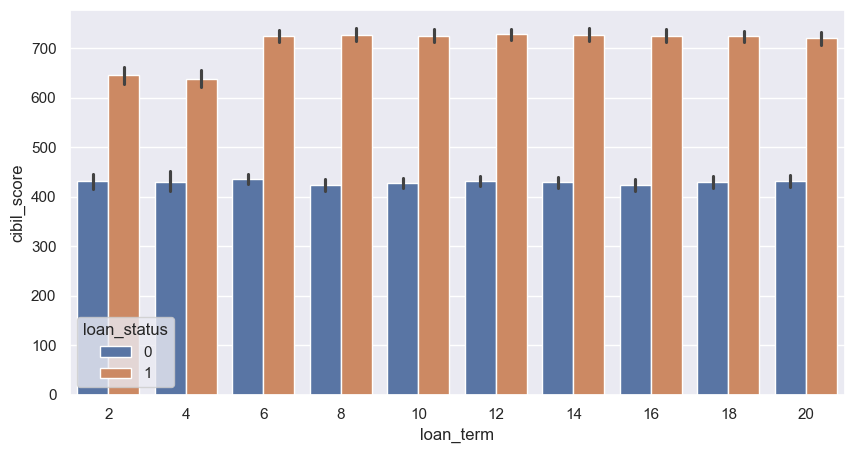

In [136]:
# Pembuatan barchart berdasarkan `overweight`, `smoker`, dan `charges`, dengan smoker sebagai klasifikasinya
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(y='cibil_score', x='loan_term', data=data_duplicate , hue='loan_status' )

dari gambar diatas terlihat mungkin terdapatnya hubungan antar cibil_score, loan_term, dan loan_status terlihat dari bertambahnya secara berkala dari tingkat lamanya pinjaman diberikan

### 5.3 Persebaran 'education' terhadap 'loan_status'

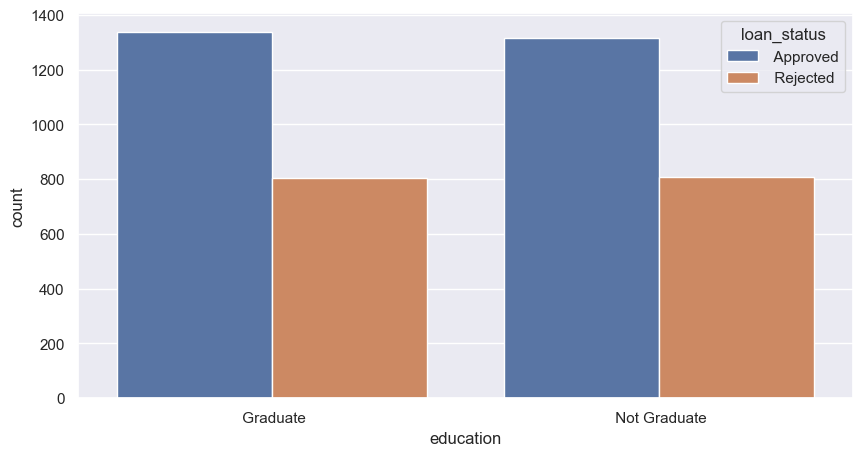

In [139]:
sns.countplot(x='education', hue='loan_status', data=df)
plt.show()

Terlihat dari visualisasi data diatas bahwa tingkat pendidikan dengan status pinjaman kemungkinan tidak ada hubungannya karena dari status pendidikan tidak ada yang berbeda

## 6. Feature Engineering

### 6.1 Normalisasi Data 

In [89]:
data_duplicate[['loan_status']]

,loan_status
0,Approved
1,Rejected
2,Rejected
3,Rejected
4,Rejected
...,...
4264,Rejected
4265,Approved
4266,Rejected
4267,Approved


Terlihat pada kolom loan_status masih berupa object oleh karena itu normalisasi dibutuhkan untuk mengubahnya menjadi numerik 

In [90]:
# menggantikan nilai loan_status menjadi approved = 1 dan rejected = 0
data_duplicate['loan_status'] = data_duplicate['loan_status'].map({' Approved': 1, ' Rejected': 0})

# show data after mapping
data_duplicate['loan_status']

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

Terlihat dari hasil perubahan diatas telah berhasil di normalisasi dimana 'Approved': 1, ' Rejected': 0, hal ini di lakukan untuk memudahkan data train nanti 

### 6.2 Korelasi Feature

In [91]:
# pembuatan variabel baru untuk menghitung korelasi pada kolom kelompok 1
corr_cols = data_temp[['loan_id','no_of_dependents','education','self_employed','loan_amount','loan_term','cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']]
correlation_matrix = corr_cols.phik_matrix()

interval columns not set, guessing: ['loan_id', 'no_of_dependents', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


<Axes: >

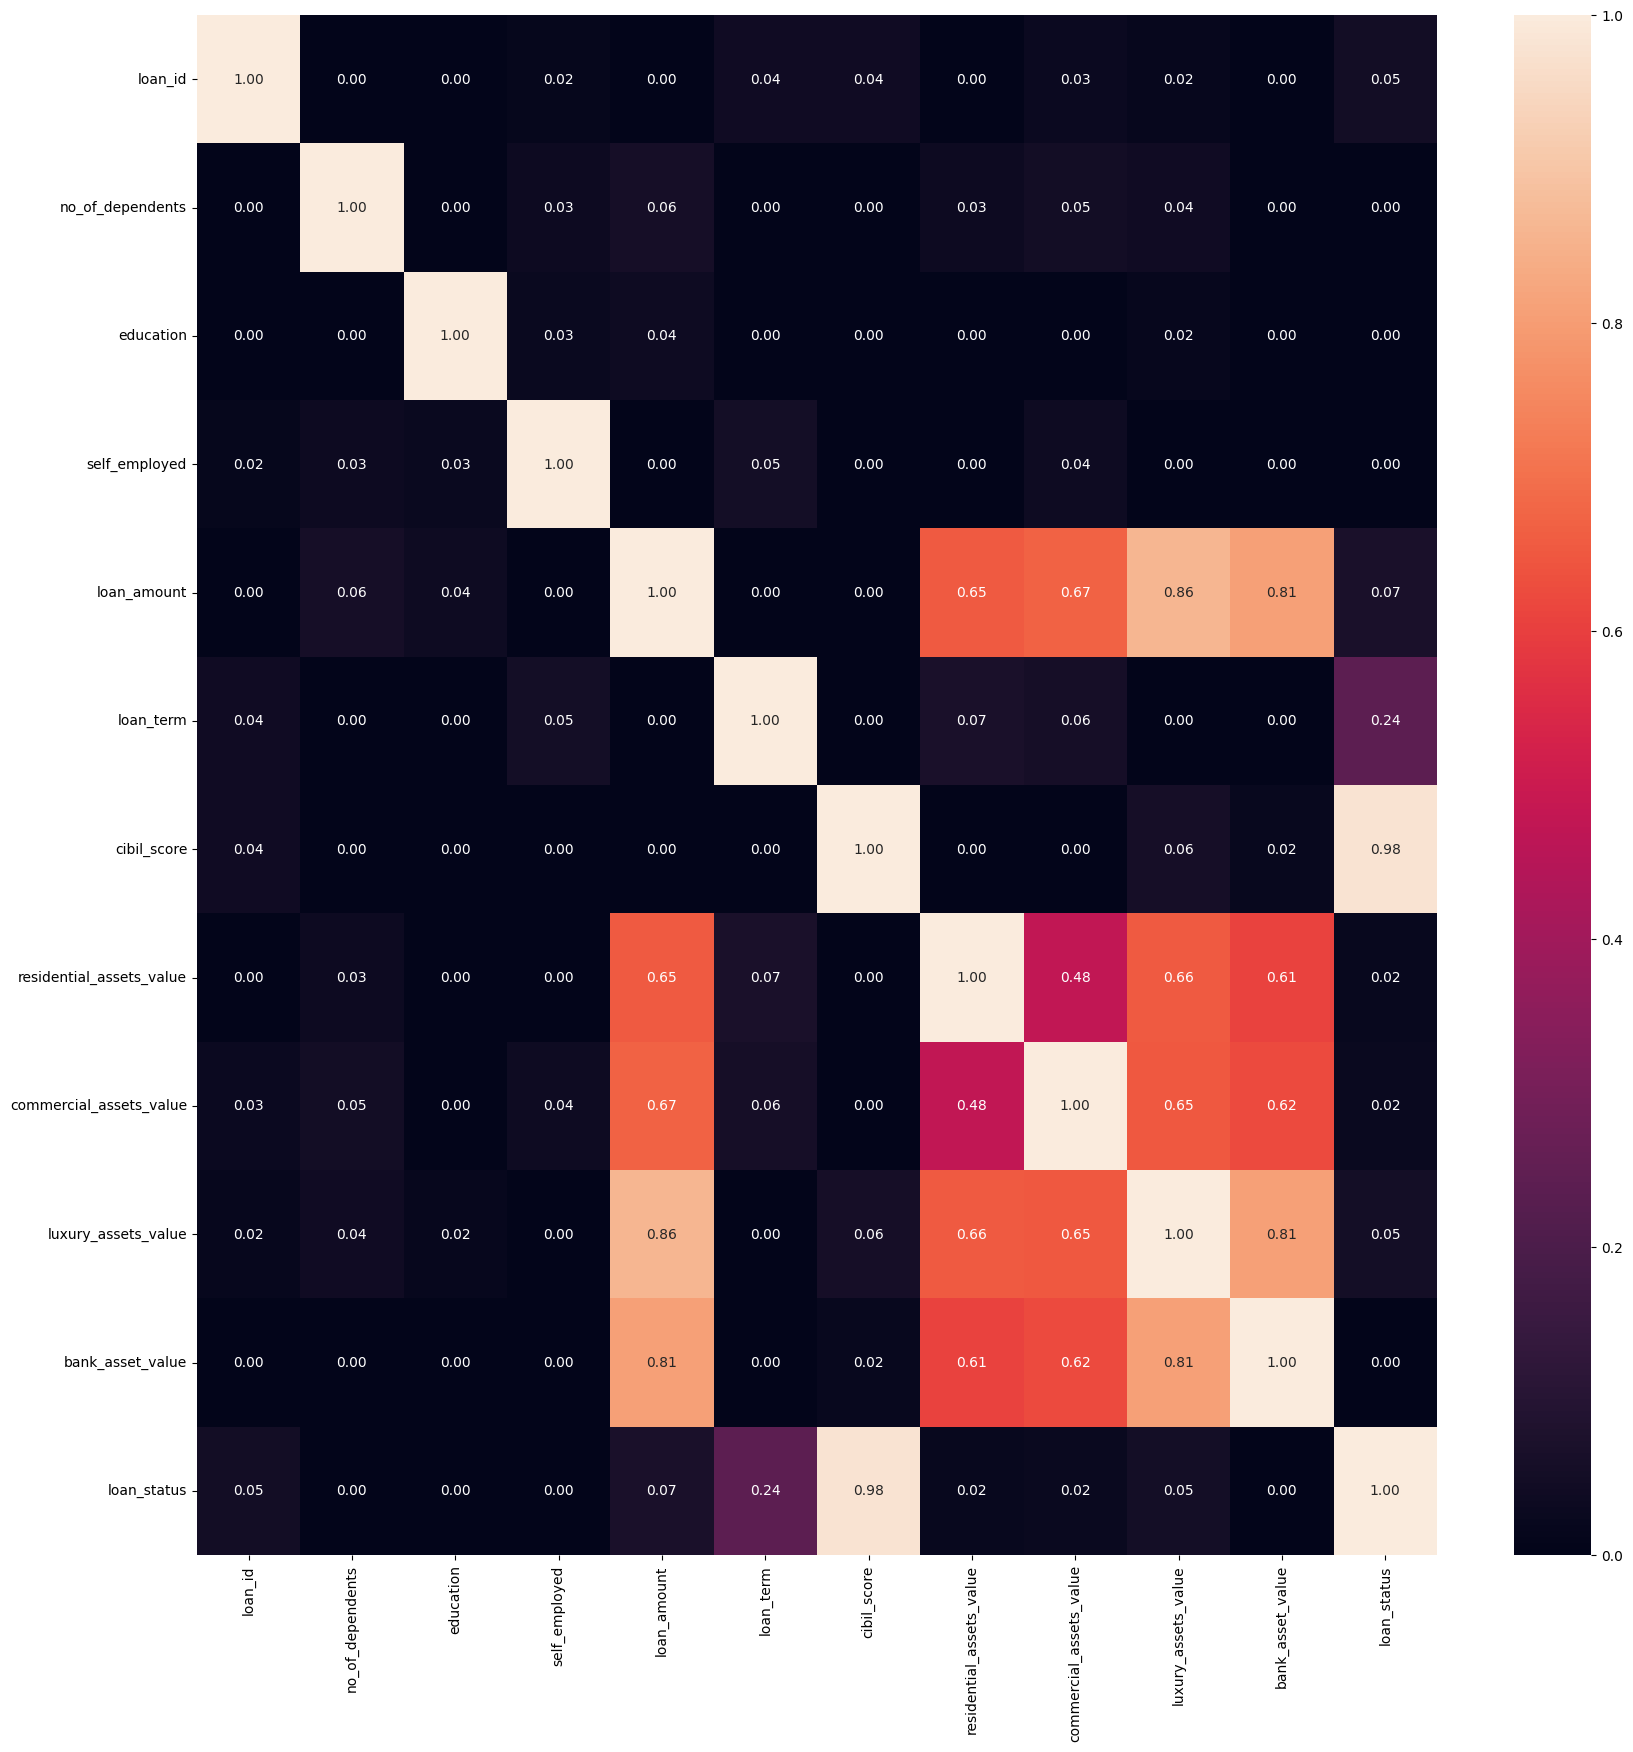

In [92]:
# pembuatan heat map korelasi dari metode phik
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

Dari dua kelompok korelasi phik yang dilakukan, korelasi yang diambil berdasarkan nilai korelasi diatas sama dengan 0.2 dengan target 'loan_status' yaitu :
1. 'cibil_socre' dengan nilai korelasi 0,98
2. 'loan_term' dengan nilai korelasi 0.24

meskipun pada kolom loan_term terlihat korelasnya sangat lemah namun kemungkinan kita akan pakai sebagai feature tambahan. untuk melihat benarkah adanya korelasi loan_term terhadap loan_status kita membutuhkan second opinion maka selanjutnya akan dilakuka pengecekan p_value

In [93]:
# mencari korelasi tau dan p_value
for i in data_temp.columns :
    corr_tau, pval_k = stats.kendalltau(data_temp[i],data_temp['loan_status'])
    print(f"tau-correlation {i} with 'loan_status' : {corr_tau}, p-value: {pval_k}")

tau-correlation loan_id with 'loan_status' : -0.014441467219101053, p-value: 0.24794198312880267
tau-correlation no_of_dependents with 'loan_status' : 0.015977135991766887, p-value: 0.23662633243605036
tau-correlation education with 'loan_status' : 0.004917865960694056, p-value: 0.7479952953723881
tau-correlation self_employed with 'loan_status' : -0.00034450753494382863, p-value: 0.9820438043874453
tau-correlation income_annum with 'loan_status' : 0.012359374146568528, p-value: 0.3252185961780618
tau-correlation loan_amount with 'loan_status' : -0.010251194130556845, p-value: 0.4128719440738956
tau-correlation loan_term with 'loan_status' : 0.09827455673589984, p-value: 6.586624607501219e-14
tau-correlation cibil_score with 'loan_status' : -0.6306949693161332, p-value: 0.0
tau-correlation residential_assets_value with 'loan_status' : 0.013445141097869314, p-value: 0.28357080496157727
tau-correlation commercial_assets_value with 'loan_status' : -0.007398190438645218, p-value: 0.5558326

Berdasarkan hasil p-value diatas, berikut adalah variabel yang memiliki korelasi signifikan dengan ‘default_payment_next_month’ (dengan asumsi ambang batas 0.05):
1. 'cibil_socre' dengan p-value 0,0 mengartikan adanya hubungan sangat erat terhadap target
2. 'loan_term' dengan p-valuei 6.586624607501219e-14 hubungan sangat erat terhadap target

kolom-kolom ini memiliki korelasi yang signifikan dengan ‘default_payment_next_month’ dan dapat digunakan untuk pemilihan feature lebih lanjut.

### 6.3 Feature Selection

Dari hasil nilai korelasi phik dengan nilai korelasi minimum diatas 0,2 dan p-value dengan asumsi ambang batas 0,05, kita mendapatkan 2 feature yaitu :
1. 'cibil_socre' dengan nilai korelasi 0,98 dan p-value 0.0 mengartikan adanya hubungan sangat erat terhadap target
2. 'loan_term' dengan nilai korelasi 0.24 dan p-value 6.586624607501219e-14 hubungan sangat erat terhadap target

In [94]:
# pembuatan data frame baru "datafinal" yang berisikan seleksi dari feature yang diambil
datafinal = data_duplicate[['loan_term','cibil_score','loan_status']]
datafinal.head(10)

,loan_term,cibil_score,loan_status
0,12,778,1
1,8,417,0
2,20,506,0
3,8,467,0
4,20,382,0
5,10,319,0
6,4,678,1
7,20,382,0
8,20,782,1
9,10,388,0


### 6.4 Splitting Data Feature (X) dan Target (y)

In [95]:
X = datafinal.drop('loan_status', axis =1)
y = datafinal['loan_status']

# Membagi data menjadi data latih dan data uji dengan test_size 30% dan random_state 0
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Menampilkan ukuran data latih dan data uji
print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)

Train size :  (2988, 2)
Test size :  (1281, 2)


### 6.5 Cardinality Check

In [96]:
# Fungsi untuk menampilkan jumlah data unik untuk setiap kolom
def print_unique_categories(datafinal, columns):
    for col in columns:
        unique_categories = len(datafinal[col].unique())
        print(f'Jumlah data unik {col: <25}: {unique_categories}')

    total_categories = len(datafinal)
    print(f'Total dataset                             : {total_categories}')

# Menampilkan jumlah data unik untuk setiap kolom pada data latih
print_unique_categories(X_train, X_train.columns)

Jumlah data unik loan_term                : 10
Jumlah data unik cibil_score              : 600
Total dataset                             : 2988


In [97]:
# Fungsi untuk menampilkan jumlah data unik untuk setiap kolom
def print_unique_categories(datafinal, columns):
    for col in columns:
        unique_categories = (datafinal[col].unique())
        print(f'isi  data unik {col: <25}: {unique_categories}')

    total_categories = len(datafinal)
    print(f'Total dataset                             : {total_categories}')

# Menampilkan jumlah data unik untuk setiap kolom pada data latih
print_unique_categories(X_train, X_train.columns)

isi  data unik loan_term                : [ 4 16  8  6 12 18 14  2 10 20]
isi  data unik cibil_score              : [554 312 479 380 895 851 859 569 649 413 789 586 802 332 606 372 849 345
 833 308 829 839 605 509 506 483 754 651 749 667 489 578 410 439 642 401
 603 810 508 737 516 622 776 708 662 385 691 523 534 799 695 574 538 317
 546 527 842 373 347 540 840 812 417 729 427 733 656 528 852 624 786 759
 658 313 493 415 395 742 387 485 614 330 690 672 767 798 792 360 482 495
 532 440 588 732 324 697 674 641 787 886 757 638 769 838 388 821 807 712
 834 795 513 414 850 763 487 587 803 665 847 573 370 700 900 443 437 709
 704 350 431 355 471 596 827 358 512 779 497 319 558 753 717 348 669 481
 592 476 837 626 382 718 365 781 890 579 381 559 880 376 858 862 391 457
 404 565 492 726 866 420 520 426 785 339 657 563 663 772 547 549 572 804
 466 438 442 613 402 645 555 611 396 756 468 723 354 421 775 828 515 562
 867 576 678 879 399 564 349 375 865 687 899 570 392 425 653 621 336 874
 885 356

Dari hasil cardinality check diatas dapat kita ketahui bahwa :
1. kolom feature dengan kategorikal : loan_term                
2. kolom feature dengan numerik continous : cibil_score              

In [98]:
# Pilih fitur numerik dan kategorikal pada data latih
X_train_num= X_train[['cibil_score']]
X_train_cat= X_train[['loan_term']]
X_test_num = X_test[['cibil_score']]
X_test_cat = X_test[['loan_term']]

### 6.6 Handling Outlier

In [99]:
# Menampilkan nilai skewness untuk setiap fitur numerik pada data latih
for i in X_train_num.columns:
    print(i)
    print(X_train_num[i].skew())
    print('-'*30)

cibil_score
-0.024965877697448492
------------------------------


In [100]:
# Melakukan winsorizing pada fitur numerik
for i in X_train_num[['cibil_score']]:
    wz_numeric = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=[i])
    X_train_num[i] = wz_numeric.fit_transform(X_train_num[[i]])

cibil_score - Before Capping


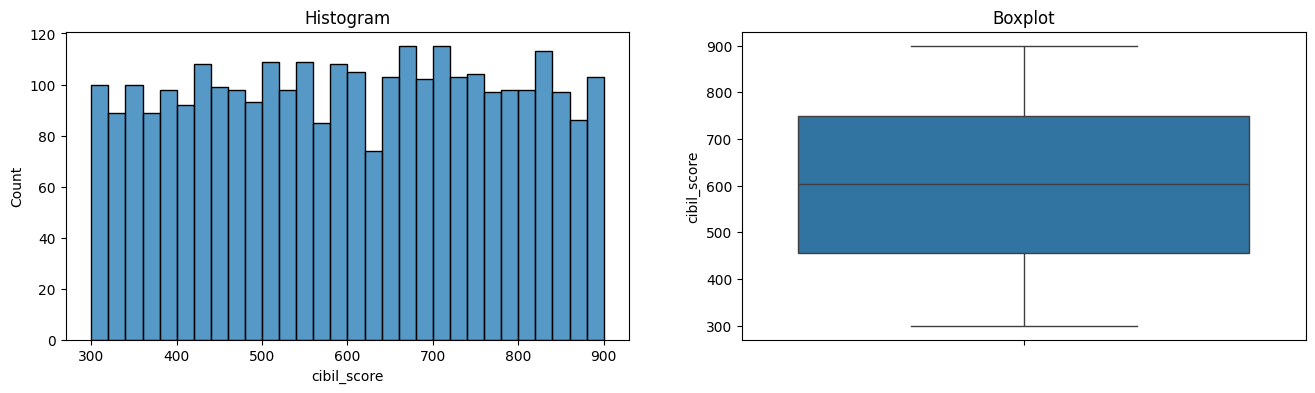

cibil_score - After Capping


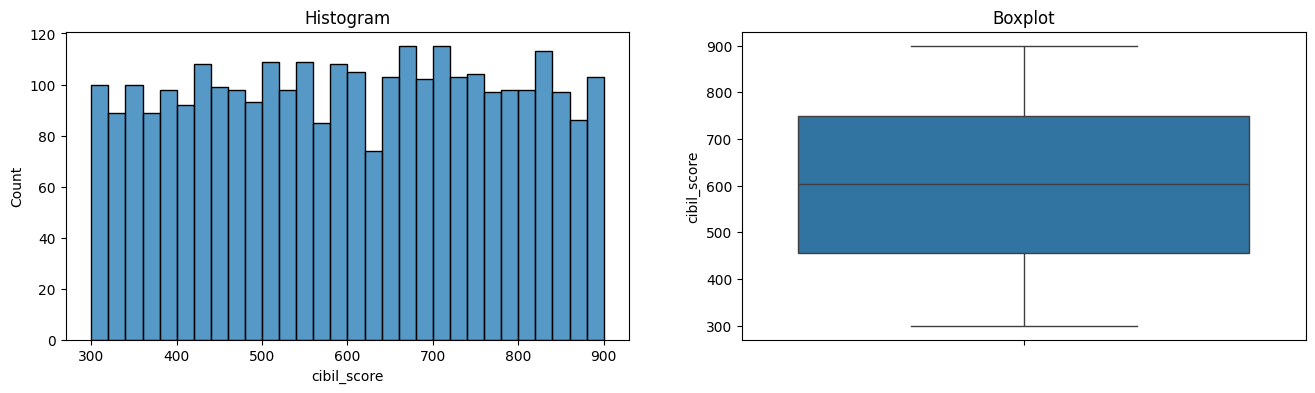

In [101]:
# Fungsi untuk membuat plot histogram dan boxplot sebelum dan sesudah capping
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Menampilkan plot sebelum dan sesudah capping untuk fitur
for i in X_train_num:
    print(f'{i} - Before Capping')
    diagnostic_plots(X_train, i)

    print(f'{i} - After Capping')
    diagnostic_plots(X_train_num, i)

In [102]:
X_train_num = wz_numeric.fit_transform(X_train)

### 6.7 Handling Missing Value

In [103]:
#Check misisng value pada X_train
X_train.isnull().sum()

loan_term      0
cibil_score    0
dtype: int64

In [104]:
#Check misisng value pada X_test
X_test.isnull().sum()

loan_term      0
cibil_score    0
dtype: int64

In [105]:
#Check missing values pada y_train
y_train.isnull().sum()

0

In [106]:
#check missing value pada y_test
y_test.isnull().sum()

0

Dari hasil diatas diketahui bahwa tidak terdapatnya nilai nan pada X_train, X_test, y_train, y_test maka handling missing value tidak perlu dilakukan.

### 6.8 Data Balancing

In [107]:
# Mencari persentase value y train 
percentage = y_train.value_counts(normalize=True) * 100

print("\\nPersentase:")
print(percentage)

\nPersentase:
loan_status
1    62.951807
0    37.048193
Name: proportion, dtype: float64


In [108]:
smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)     

X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

loan_status
1    1881
0    1881
Name: count, dtype: int64

Dapat diketahui bahwa nilai dari target train merupakan masuk kedalam kategori **mild imbalance** (20-40% dari dataset) dengan persentase 37.04% dari total jumlah data. Meskipun kurangnya hanya 2.96% untuk mencapai balance data, baiknya target train tetap harus di handle balancing datanya dengan tujuan mendapatkan hasil prediksi yang lebih optimal.

### 6.9 Encoding & Scaling

In [109]:
# Define categorical columns
cat_cols = ['loan_term']

# Define the fix numerical columns
num_cols = ['cibil_score']

preprocessing = ColumnTransformer([
    ('pipe_num', StandardScaler(), cat_cols),
    ('pipe_cat', 'passthrough', num_cols)
], remainder='drop')

preprocessing

ColumnTransformer(transformers=[('pipe_num', StandardScaler(), ['loan_term']),
                                ('pipe_cat', 'passthrough', ['cibil_score'])])

## 7. Model Definition

### 7.1 KNN

In [110]:
# Definisi model
knn = make_pipeline(preprocessing, KNeighborsClassifier())

KNeighborsClassifier adalah model klasifikasi dalam supervised learning yang berfungsi dengan membandingkan data baru dengan kumpulan data yang ada (training set), dan mengklasifikasikannya berdasarkan mayoritas kelas dari k tetangga terdekat. Nilai k adalah parameter yang ditentukan oleh pengguna dan mempengaruhi hasil klasifikasi.

Berikut adalah beberapa hyperparameter yang umumnya disetel dalam KNeighborsClassifier:

1. n_neighbors: Jumlah tetangga yang akan digunakan secara default untuk query k-neighbors. Biasanya, kita mencoba nilai ganjil untuk menghindari kebuntuan.
2. weights: Fungsi bobot yang digunakan dalam prediksi. Nilai yang mungkin adalah:
3. ‘uniform’: Bobot seragam. Semua poin dalam setiap lingkungan memiliki bobot yang sama.
4. ‘distance’: Bobot titik dengan invers jarak. Dalam hal ini, tetangga terdekat dari titik kueri akan memiliki pengaruh lebih besar daripada tetangga yang lebih jauh.
5. algorithm: Algoritma yang digunakan untuk menghitung tetangga terdekat. Nilai yang mungkin adalah ‘auto’, ‘ball_tree’, ‘kd_tree’, atau ‘brute’.
6. leaf_size: Ukuran daun yang dilewatkan ke BallTree atau KDTree. Ini dapat mempengaruhi kecepatan konstruksi dan kueri, serta memori yang diperlukan untuk menyimpan struktur pohon.
7. p: Parameter kekuatan untuk metrik Minkowski. Ketika p = 1, ini setara dengan menggunakan manhattan_distance (l1), dan euclidean_distance (l2) untuk p = 2.

### 7.2 SVM

In [111]:
# Devinisi model
svm = make_pipeline(preprocessing, SVC())

SVC (Support Vector Classifier) adalah implementasi dari Support Vector Machine (SVM) untuk kasus klasifikasi dalam library scikit-learn. SVM adalah metode dalam supervised learning yang digunakan untuk klasifikasi dan regresi. Dalam konteks klasifikasi, SVM bekerja dengan mencari hyperplane yang memisahkan data dari dua kelas sebaik mungkin.

Berikut adalah beberapa hyperparameter yang umumnya disetel dalam SVC:

1. C: Parameter regularisasi. Nilai C yang lebih kecil membuat batas keputusan lebih halus, sementara nilai yang lebih besar bertujuan untuk mengklasifikasikan semua sampel pelatihan dengan benar dengan memberikan model kebebasan untuk memilih lebih banyak sampel sebagai vektor pendukung.
2. kernel: Spesifikasi kernel yang digunakan dalam algoritma. Bisa ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ atau callable. Jika tidak ada, ‘rbf’ akan digunakan.
3. degree: Derajat fungsi kernel polinomial (‘poly’). Hanya signifikan dalam ‘poly’.
4. gamma: Koefisien kernel untuk ‘rbf’, ‘poly’ dan ‘sigmoid’.
5. coef0: Istilah independen dalam fungsi kernel. Ini hanya signifikan dalam ‘poly’ dan ‘sigmoid’.

### 7.3 DecisionTreeClassifier

In [112]:
# Devinisi model
tree = make_pipeline(preprocessing, DecisionTreeClassifier())

DecisionTreeClassifier adalah model dalam supervised learning yang menggunakan struktur pohon keputusan atau model logika Boolean untuk melakukan klasifikasi berdasarkan fitur tertentu. Setiap simpul dalam pohon merepresentasikan fitur dalam kumpulan data, setiap cabang merepresentasikan aturan keputusan, dan setiap daun merepresentasikan hasil.

Berikut adalah beberapa hyperparameter yang umumnya disetel dalam DecisionTreeClassifier:

1. criterion: Fungsi untuk mengukur kualitas split. Nilai yang didukung adalah “gini” untuk impurity Gini dan “entropy” untuk gain informasi.
2. splitter: Strategi yang digunakan untuk memilih split pada setiap simpul. Nilai yang didukung adalah “best” untuk memilih split terbaik dan “random” untuk memilih split terbaik secara acak.
3. max_depth: Kedalaman maksimum pohon. Jika tidak ditentukan, pohon akan diperluas sampai semua daun murni atau sampai semua daun berisi kurang dari min_samples_split sampel.
4. min_samples_split: Jumlah sampel minimum yang diperlukan untuk membagi simpul internal.
5. min_samples_leaf: Jumlah sampel minimum yang diperlukan untuk menjadi daun simpul.
6. max_features: Jumlah fitur yang perlu dipertimbangkan saat mencari split terbaik.

### 7.4 RandomForestClassifier

In [113]:
#Devinisi model
rdf = make_pipeline(preprocessing, RandomForestClassifier())

RandomForestClassifier adalah model dalam supervised learning yang merupakan metode ensemble dari Decision Trees. Ini berarti bahwa model ini menggabungkan banyak pohon keputusan untuk membuat prediksi, yang biasanya lebih akurat daripada menggunakan satu pohon keputusan saja.

Berikut adalah beberapa hyperparameter yang umumnya disetel dalam RandomForestClassifier:

1. n_estimators: Jumlah pohon dalam hutan. Biasanya, semakin banyak pohon, semakin baik model akan belajar data. Namun, peningkatan jumlah pohon juga berarti peningkatan komputasi.
2. criterion: Fungsi untuk mengukur kualitas split. Nilai yang didukung adalah “gini” untuk impurity Gini dan “entropy” untuk gain informasi.
3. max_depth: Kedalaman maksimum pohon. Jika tidak ditentukan, pohon akan diperluas sampai semua daun murni atau sampai semua daun berisi kurang dari min_samples_split sampel.
4. min_samples_split: Jumlah sampel minimum yang diperlukan untuk membagi simpul internal.
5. min_samples_leaf: Jumlah sampel minimum yang diperlukan untuk menjadi daun simpul.
6. max_features: Jumlah fitur yang perlu dipertimbangkan saat mencari split terbaik.

### 7.5 XGBClassifier

In [114]:
# Devinisi model
xgb = make_pipeline(preprocessing, XGBClassifier())

XGBClassifier adalah implementasi dari algoritma XGBoost (eXtreme Gradient Boosting) untuk kasus klasifikasi. XGBoost adalah metode ensemble yang menggabungkan banyak model prediktif untuk menghasilkan prediksi yang lebih baik. Dalam hal ini, model prediktif adalah pohon keputusan.

Berikut adalah beberapa hyperparameter yang umumnya disetel dalam XGBClassifier:

1. n_estimators: Jumlah pohon yang akan dibuat dalam proses boosting.
2. learning_rate: Kecepatan di mana model beradaptasi terhadap pola. Nilai yang lebih rendah membuat model lebih robust terhadap overfitting.
3. max_depth: Kedalaman maksimum pohon. Nilai yang lebih besar membuat model lebih kompleks, yang dapat meningkatkan risiko overfitting.
4. min_child_weight: Jumlah minimum bobot yang diperlukan untuk menciptakan simpul anak baru. Nilai yang lebih besar mengurangi risiko overfitting.
5. gamma: Nilai minimum penurunan loss yang diperlukan untuk membuat split lebih lanjut pada simpul daun.
6. subsample: Proporsi sampel yang digunakan untuk melatih setiap pohon.
7. colsample_bytree: Proporsi fitur yang digunakan untuk melatih setiap pohon.

## 8. Model Training

In [115]:
# Fit Train
knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num', StandardScaler(),
                                                  ['loan_term']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['cibil_score'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [116]:
# Fit Train
svm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num', StandardScaler(),
                                                  ['loan_term']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['cibil_score'])])),
                ('svc', SVC())])

In [117]:
# Fit Train
tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num', StandardScaler(),
                                                  ['loan_term']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['cibil_score'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [118]:
# Fit Train
rdf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num', StandardScaler(),
                                                  ['loan_term']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['cibil_score'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [119]:
# Fit Train
xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num', StandardScaler(),
                                                  ['loan_term']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['cibil_score'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_cat...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

## 9.Model Evaluation

### 9.1 Cross Validation Base Model

In [120]:
# set skfold
skfold=StratifiedKFold(n_splits=5)
# checking cross validation score
cv_knn_model = cross_val_score(knn, X_train, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm, X_train, y_train, cv=skfold, scoring="recall")
cv_tree_model = cross_val_score(tree, X_train, y_train, cv=skfold, scoring="recall")
cv_rdf_model = cross_val_score(rdf, X_train, y_train, cv=skfold, scoring="recall")
cv_xgb_model = cross_val_score(xgb, X_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_tree_model,cv_rdf_model,cv_xgb_model],['knn_model','svm_model','tree_model','rdf_model','xgb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
recall - All - Cross Validation  :  [0.92838196 0.92021277 0.94148936 0.93882979 0.94680851]
recall - Mean - Cross Validation :  0.9351444776793272
recall - Std - Cross Validation  :  0.009576808927904116
recall - Range of Test-Set       :  0.925567668751423 - 0.9447212866072313
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.89124668 0.8962766  0.90159574 0.88829787 0.91755319]
recall - Mean - Cross Validation :  0.8989940177210904
recall - Std - Cross Validation  :  0.010324969701621207
recall - Range of Test-Set       :  0.8886690480194692 - 0.9093189874227117
--------------------------------------------------
tree_model
recall - All - Cross Validation  :  [0.9469496  0.94946809 0.95478723 0.95744681 0.95212766]
recall - Mean - Cross Validation :  0.9521558778712118
recall - Std - Cross Validation  :  0.0037215135557265053
recall - Range of Test-Set       :  0.9484343643154853 - 0.9558773914269383
------------------------

Berdasarkan hasil di atas, model xgb_model (XGBoost) adalah model terbaik dengan nilai rata-rata recall tertinggi dalam validasi silang, yaitu sebesar 0.9617. Nilai ini menunjukkan bahwa model ini paling efektif dalam mengidentifikasi pinjaman yang seharusnya disetujui.

Recall adalah metrik yang sangat penting dalam konteks dataset Persetujuan Pinjaman. Ini karena tujuan utama dari model ini adalah untuk meminimalkan jumlah pinjaman yang seharusnya disetujui tetapi diprediksi sebagai ditolak oleh model (false negatives). Dengan kata lain, kita ingin memastikan bahwa sebanyak mungkin pinjaman yang layak mendapatkan persetujuan. Oleh karena itu, recall (yang mengukur persentase true positives dari total actual positives) adalah metrik yang tepat untuk digunakan dalam kasus ini.

### 9.2 Best Model

In [121]:
# membuat variable predict
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

recall Score - Test Set   :  0.9574193548387097 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1881
           1       0.98      0.98      0.98      1881

    accuracy                           0.98      3762
   macro avg       0.98      0.98      0.98      3762
weighted avg       0.98      0.98      0.98      3762

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       506
           1       0.96      0.96      0.96       775

    accuracy                           0.95      1281
   macro avg       0.95      0.95      0.95      1281
weighted avg       0.95      0.95      0.95      1281



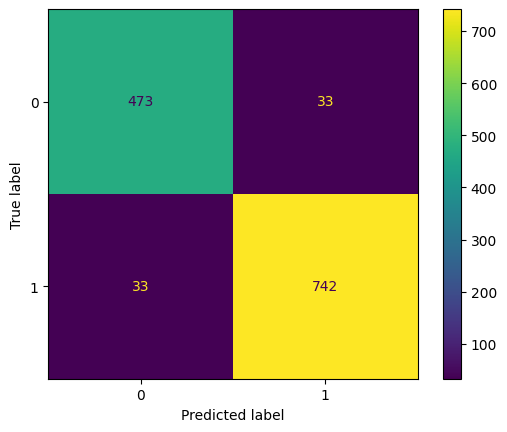

In [122]:
# Model Evaluation - Train Set

print('recall Score - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print(classification_report(y_train, y_pred_train))

# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test))

# Confusion Matrix - test Set
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_test).plot()

Berdasarkan laporan klasifikasi diatas, model terlihat berkinerja sangat baik, baik pada data train maupun data test pada best base model. Berikut adalah beberapa poin penting:

1. **Data Train:** Model Anda mencapai akurasi sebesar 98% dengan nilai recall 0.98 untuk kedua kelas (0 dan 1). Ini menunjukkan bahwa model Anda mampu mengidentifikasi sebagian besar pinjaman yang seharusnya disetujui dan yang seharusnya ditolak dengan benar.
2. **Data Test:** Pada data uji, model Anda mencapai akurasi sebesar 95%. Nilai recall untuk kelas 0 adalah 0.93 dan untuk kelas 1 adalah 0.96. Meskipun sedikit lebih rendah dibandingkan dengan data latih, performa ini masih sangat baik.

Terlihat pula hasil confusion matric diatas yang menggambarkan  :
Berdasarkan matriks kebingungan (confusion matrix) yang Anda berikan, berikut adalah kesimpulannya:

1. **True Positives (TP)**: Model dengan tepat memprediksi pinjaman yang disetujui. Dari gambar, tampak bahwa ada 741 true positives, yang berarti ada 741 pinjaman yang benar-benar disetujui dan model memprediksinya dengan benar.
2. **True Negatives (TN)**: Model dengan tepat memprediksi pinjaman yang ditolak. Dari gambar, tampak bahwa ada 474 true negatives, yang berarti ada 474 pinjaman yang sebenarnya ditolak dan model memprediksinya dengan benar.
3. **False Positives (FP)**: Model salah memprediksi pinjaman yang seharusnya ditolak sebagai disetujui. Dari gambar, tampak bahwa ada 32 false positives, yang berarti ada 32 pinjaman yang sebenarnya ditolak tetapi model memprediksinya sebagai disetujui.
4. **False Negatives (FN)**: Model salah memprediksi pinjaman yang seharusnya disetujui sebagai ditolak. Dari gambar, tampak bahwa ada 34 false negatives, yang berarti ada 34 pinjaman yang sebenarnya disetujui tetapi model memprediksinya sebagai ditolak.

Secara keseluruhan, model berkinerja cukup baik dengan jumlah true positives dan true negatives yang tinggi dan jumlah false positives dan false negatives yang relatif rendah.  Menggunakan recall sebagai metrik evaluasi dalam konteks ini sangat penting. Dalam kasus pinjaman, kita ingin meminimalkan jumlah pinjaman yang seharusnya disetujui tetapi diprediksi sebagai ditolak oleh model (false negatives). Oleh karena itu, recall (yang mengukur persentase true positives dari total actual positives) adalah metrik yang tepat untuk digunakan dalam kasus ini.

### 9.2 Best Model with hyperparameter

In [123]:
param_dist = {
    'model__n_estimators': randint(100, 1000),       # Number of trees
    'model__learning_rate': [0.01, 0.1, 0.2],        # Step size shrinkage
    'model__max_depth': randint(3, 15),              # Maximum depth of the tree
    'model__min_child_weight': randint(1, 10),       # Minimum sum of instance weight (hessian) needed in a child
    'model__subsample': [0.8, 0.9, 1.0],             # Fraction of samples used for fitting the trees
    'model__colsample_bytree': [0.8, 0.9, 1.0],      # Fraction of features used for fitting the trees
    'model__gamma': [0, 0.1, 0.2],                   # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'model__reg_alpha': [0, 0.1, 0.2],               # L1 regularization term on weights
    'model__reg_lambda': [0, 0.1, 0.2],              # L2 regularization term on weights
}
param_dist

{'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x21c7de19f10>,
 'model__learning_rate': [0.01, 0.1, 0.2],
 'model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x21c7e78b150>,
 'model__min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x21c7e70cf10>,
 'model__subsample': [0.8, 0.9, 1.0],
 'model__colsample_bytree': [0.8, 0.9, 1.0],
 'model__gamma': [0, 0.1, 0.2],
 'model__reg_alpha': [0, 0.1, 0.2],
 'model__reg_lambda': [0, 0.1, 0.2]}

In [124]:
xgb2 = XGBClassifier()

# Train with Randomized Search
xgb_gridcv = RandomizedSearchCV(
    estimator=xgb2,
    param_distributions=param_dist,
    refit=True,
    return_train_score=True,
    cv=5,
    n_jobs=-1,
    verbose=3,
    scoring='recall'
)

# Fit the model
xgb_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'model__min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C7E70CF10>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021C7DE19F10>,
                                        'model__reg_alpha': [0, 0.1, 0.2],
                                        'model__reg_lambda': [0, 0.1, 0.2],
                                        'model__subsample': [0.8, 0.9, 1.0]},
                   return_train_score=True, scoring='recall', verbose=3)

In [125]:
# Display Best Hyperparamters from Random Search
xgb_gridcv.best_params_

{'model__colsample_bytree': 1.0,
 'model__gamma': 0.2,
 'model__learning_rate': 0.1,
 'model__max_depth': 9,
 'model__min_child_weight': 9,
 'model__n_estimators': 672,
 'model__reg_alpha': 0.2,
 'model__reg_lambda': 0,
 'model__subsample': 1.0}

recall Score - Test Set   :  0.9574193548387097 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       506
           1       0.96      0.96      0.96       775

    accuracy                           0.95      1281
   macro avg       0.95      0.95      0.95      1281
weighted avg       0.95      0.95      0.95      1281
 



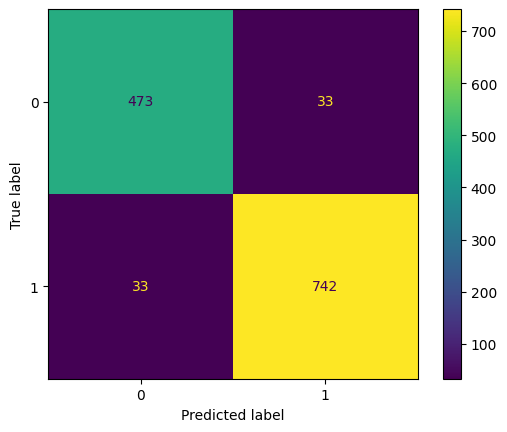

In [126]:
# Get Best Estimator
xgb_gridcv_best = xgb_gridcv.best_estimator_

y_pred_xgbgv = xgb_gridcv_best.predict(X_test)
print('recall Score - Test Set   : ', recall_score(y_test, y_pred_xgbgv), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_xgbgv), '\n')
cm_xgb_gv = confusion_matrix(y_test, y_pred_xgbgv)
ConfusionMatrixDisplay(cm_xgb_gv).plot()

Berdasarkan laporan klasifikasi diatas berikan, dari model terbaik dengan param dan hyperparameter tuning berkinerja sangat baik pada data test. Berikut adalah beberapa poin penting:

1. **Recall**: Nilai recall untuk data uji adalah 0.9574, yang berarti model berhasil mengidentifikasi sekitar 95.74% dari pinjaman yang seharusnya disetujui dengan benar.

2. **Precision**: Nilai precision untuk kelas 0 (tidak disetujui) dan 1 (disetujui) adalah 0.93 dan 0.96, yang berarti model sangat akurat dalam memprediksi kedua kelas tersebut.

3. **F1-Score**: Nilai F1-score, yang merupakan rata-rata harmonik dari precision dan recall, juga tinggi (0.93 untuk kelas 0 dan 0.96 untuk kelas 1). Ini menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall.

4. **Accuracy**: Akurasi keseluruhan model pada data uji adalah 0.95, yang berarti model memprediksi kelas yang benar sekitar 95% dari waktu.

In [127]:
print('Score Recall :')
print('Classification Report Baseline: \n', recall_score(y_test, y_pred_test), '\n')
print('Classification Report Hyperparameter dan Random Search : \n', recall_score(y_test, y_pred_xgbgv), '\n')

Score Recall :
Classification Report Baseline: 
 0.9574193548387097 

Classification Report Hyperparameter dan Random Search : 
 0.9574193548387097 



Berdasarkan hasil diatas, tampaknya tidak ada perbedaan dalam skor recall antara model baseline dan model yang telah dioptimalkan dengan pencarian hyperparameter dan random search. Kedua model tersebut menghasilkan skor recall yang sama, yaitu 0.9574. Meskipun tidak ada peningkatan dalam skor recall setelah optimasi hyperparameter, proses ini masih penting karena dapat membantu meningkatkan metrik evaluasi lainnya dan mencegah overfitting.

### 10. Model Saving

In [128]:
#model saving
joblib.dump(xgb, "model.pkl")

['model.pkl']

## 11. Model Inference

**Model inferece dilakukan pada P1M2_Akram_inf.ipynb.**

## 12. Kesimpulan

Berdasarkan hasil di atas, berikut adalah kesimpulan, kelebihan, kelemahan, dan saran untuk peningkatan:

**Kesimpulan**: Model XGBoost  telah menunjukkan kinerja yang sangat baik dalam memprediksi persetujuan pinjaman, dengan skor recall rata-rata tertinggi dalam validasi silang dan kinerja yang baik pada data latih dan uji. Meskipun tidak ada peningkatan dalam skor recall setelah optimasi hyperparameter, proses ini masih penting karena dapat membantu meningkatkan metrik evaluasi lainnya dan mencegah overfitting.

**Kelebihan**:

1. Model memiliki skor recall yang tinggi, yang berarti model efektif dalam mengidentifikasi pinjaman yang seharusnya disetujui.
2. Model juga memiliki skor precision yang tinggi, yang berarti model efektif dalam mengidentifikasi pinjaman yang seharusnya ditolak.
3. Model menunjukkan kinerja yang baik baik pada data latih maupun data uji, yang menunjukkan bahwa ia memiliki generalisasi yang baik dan tidak overfitting.

**Kelemahan**:

1. Meskipun model  memiliki skor recall yang tinggi, masih ada beberapa pinjaman yang seharusnya disetujui tetapi diprediksi sebagai ditolak (false negatives), dan beberapa pinjaman yang seharusnya ditolak tetapi diprediksi sebagai disetujui (false positives).
2. Optimasi hyperparameter tidak menghasilkan peningkatan dalam skor recall.

**Saran untuk Peningkatan:**

1. Dapat mencoba model lain selain XGBoost untuk melihat apakah mereka dapat memberikan peningkatan dalam skor recall.
2. Dapat mencoba teknik resampling seperti oversampling atau undersampling untuk menangani ketidakseimbangan kelas, yang mungkin dapat membantu meningkatkan skor recall.
3. Dapat mencoba mengumpulkan lebih banyak data atau mencoba fitur engineering untuk menciptakan fitur baru yang mungkin dapat membantu meningkatkan kinerja model. 